In [310]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

from statsmodels.formula.api import ols

pd.set_option('mode.chained_assignment', None)

import matplotlib.pyplot as plt

plt.style.use('ggplot')

from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # plots configuration

# read the dataset

df = pd.read_csv('E:\The Journey\Career\Data Science\_Portfolio Projects\Python Projects\Correlation-Movies\Dataset\movies.csv')

In [242]:
# let's look at the data 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [243]:
# Check on data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.0%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


<Axes: >

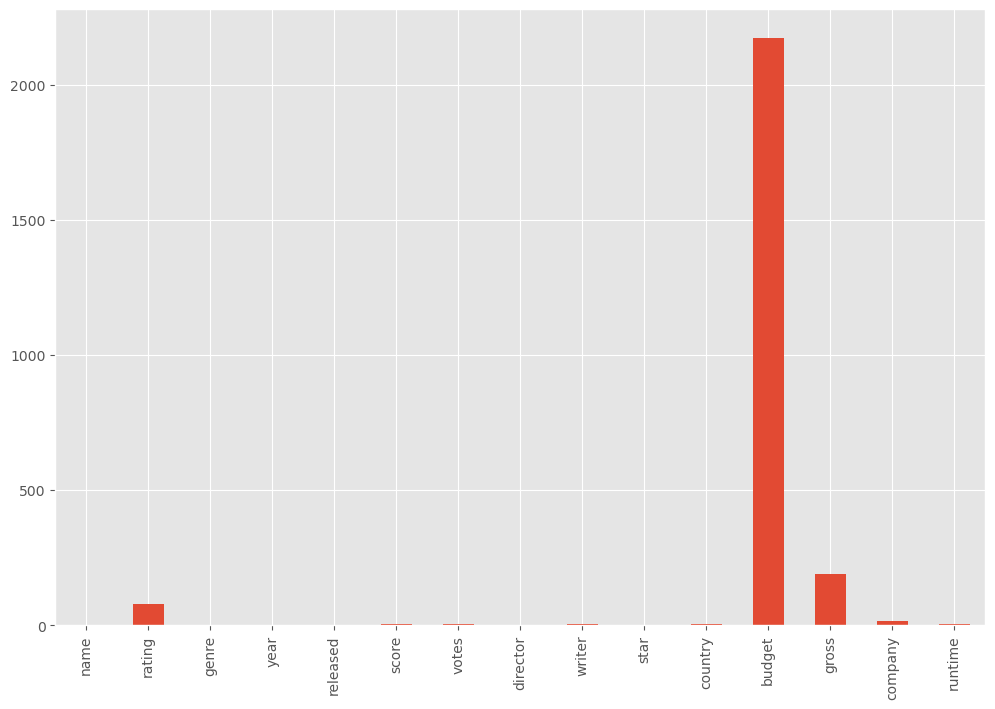

In [244]:
# Checking nulls

for col in df.columns:
    null_pct = round(np.mean(df[col].isnull())*100,2)
    print('{} - {}%'.format(col,null_pct))
    
# plot nulls
df.isna().sum().plot(kind='bar')

In [245]:
# Dealing with columns with nulls less or equal 5%df

columns_to_drop_na_from = df.columns[df.isna().sum() <= len(df)*0.05]
print(columns_to_drop_na_from)

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'gross', 'company', 'runtime'],
      dtype='object')


In [246]:
# Drop the 5% columns

df_cleaned = df.dropna(subset = columns_to_drop_na_from)


In [247]:
for col in df_cleaned.columns:
    null_pct = round(np.mean(df_cleaned[col].isna())*100,2)
    print('{} - {}%'.format(col,null_pct))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 26.86%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [248]:
# for budget column that has more than 5% null values

# creating year vs budget dictionary

year_budget_dict = df_cleaned.groupby('year')['budget'].median().to_dict()

# filling budget null values by mapping from the dict

df_cleaned.loc[df_cleaned['budget'].isnull(),'budget'] = df_cleaned['budget'].fillna(df_cleaned['year'].map(year_budget_dict))


In [249]:
for col in df_cleaned.columns:
    null_pct = round(np.mean(df_cleaned[col].isna())*100,2)
    print('{} - {}%'.format(col,null_pct))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [250]:
# Change some data types to get rid of xxxx.0

df_cleaned['budget'] = df_cleaned['budget'].astype('int64')
df_cleaned['votes'] = df_cleaned['votes'].astype('int64')
df_cleaned['gross'] = df_cleaned['gross'].astype('int64')

df_cleaned.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0


In [251]:
# match year with released columns

df_cleaned['year_modified'] = df_cleaned['released'].astype('str').str.split().str[2]
df_cleaned.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_modified
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980


In [252]:
# Drop any duplicates

df_cleaned.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_modified
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400,Scott Teems,Scott Teems,Shea Whigham,United States,87500000,3661,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,87500000,413378,Pryor Entertainment,120.0,2020


In [253]:
# Outliers Check

df_cleaned.describe()

,year,score,votes,budget,gross,runtime
count,7412.000000,7412.000000,7.412000e+03,7.412000e+03,7.412000e+03,7412.000000
mean,2000.640718,6.396910,9.076357e+04,3.198869e+07,7.899355e+07,107.446438
std,11.028736,0.963162,1.653466e+05,3.646485e+07,1.662164e+08,18.517471
min,1980.000000,1.900000,1.050000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1991.000000,5.800000,1.000000e+04,1.150000e+07,4.633888e+06,95.000000
50%,2001.000000,6.500000,3.400000e+04,2.200000e+07,2.040352e+07,104.000000
75%,2010.000000,7.100000,9.600000e+04,3.500000e+07,7.644231e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [254]:
# Which movie made the $2,847,246,203 ?!!

df_cleaned.query("gross == gross.max()")

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_modified
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009


C:\Users\mosta\AppData\Local\Temp\ipykernel_15260\3750912391.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr(), annot = True)


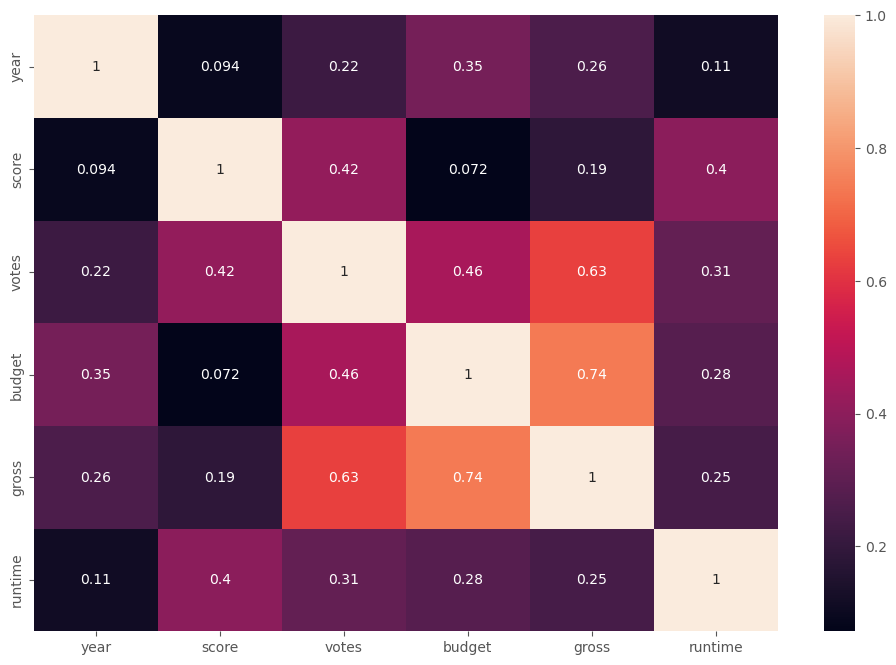

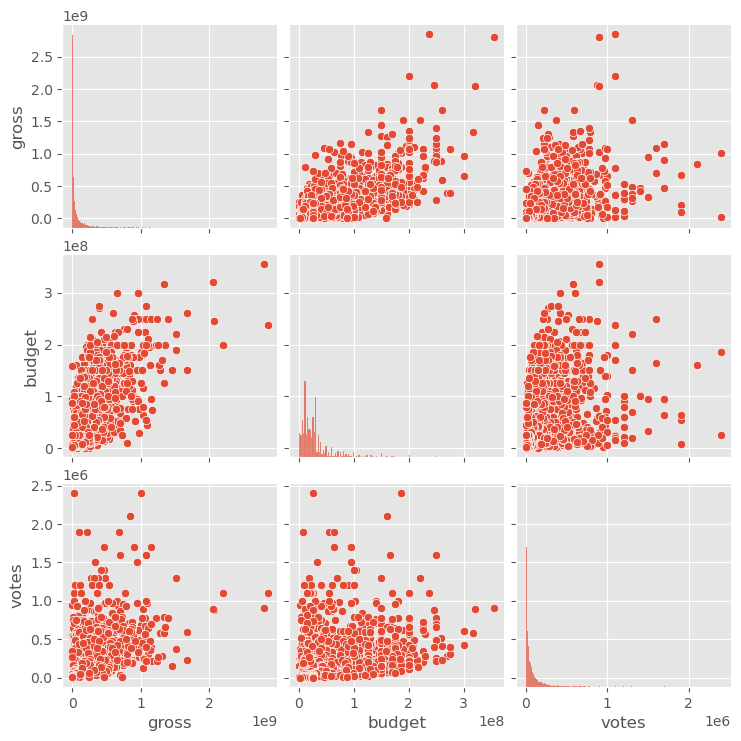

In [255]:
# Check other correlations with heatmap & pairplot
# heatmap
sns.heatmap(df_cleaned.corr(), annot = True)
plt.show()

# pairplot
sns.pairplot(data=df_cleaned, vars=['gross','budget','votes'])
plt.show()

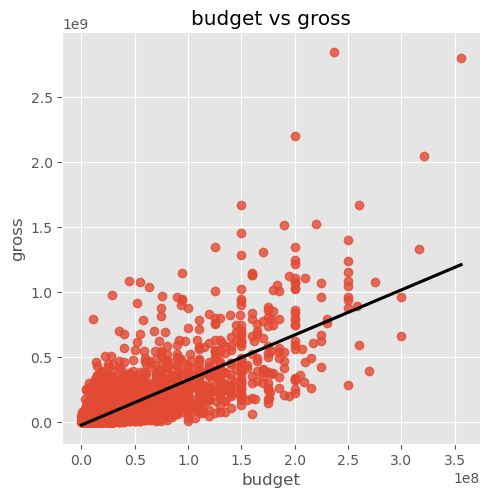

0.7448963246594482

In [265]:
# Check gross corellations
## gross vs budget

sns.lmplot(x='budget', y='gross', data = df_cleaned, line_kws = {'color':'black'}, ci = None)
plt.title('budget vs gross')
plt.show()


df_cleaned['budget'].corr(df_cleaned['gross']) # pearson

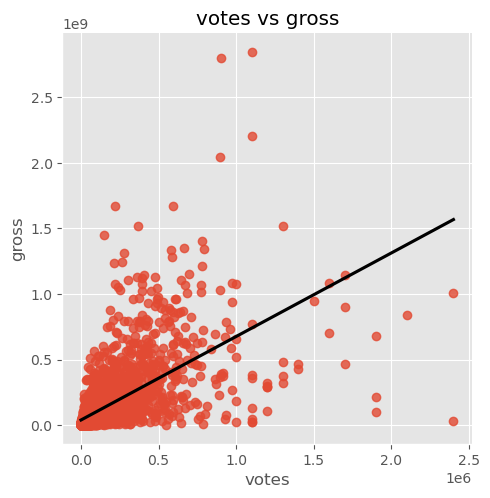

0.630200855338651

In [264]:
# Check gross corellations
## gross vs votes

sns.lmplot(x='votes', y='gross', data = df_cleaned, line_kws = {'color':'black'}, ci = None)
plt.title('votes vs gross')
plt.show()


df_cleaned['votes'].corr(df_cleaned['gross']) # pearson

In [ ]:
# THERE ARE STRONG CORRELATION FOUND BETWEEN GROSS AND BUDGET
# THERE ARE MODERATE CORRELATION FOUND BETWEEN GROSS AND VOTES

In [257]:
# Distinguish company names (e.g. xx_Disney and yy_Disney = Just_Disney)
## Check unique company names


print(df_cleaned['company'].value_counts())


Universal Pictures              376
Warner Bros.                    332
Columbia Pictures               332
Paramount Pictures              319
Twentieth Century Fox           240
                               ... 
Too Askew Prod. Inc.              1
McFarlane Films                   1
Blue Tulip Productions            1
Cinema Line Film Corporation      1
Pryor Entertainment               1
Name: company, Length: 2242, dtype: int64


In [261]:
## relinquish all companies that have less than 10 movies
### the series
the_companies = df_cleaned["company"].value_counts()
### filtered series
selected_companies = the_companies[the_companies > 10].index
### filtered df
df_cleaned = df_cleaned[df_cleaned['company'].isin(selected_companies)]

In [269]:
# Distingush company names

df_cleaned['company'][df_cleaned["company"].str.contains('Disney')].value_counts()

Walt Disney Pictures             123
Walt Disney Animation Studios     17
Name: company, dtype: int64

In [274]:
# Adding company_modified column

df_cleaned['company_modified'] = np.select([df_cleaned['company'].str.contains('Disney')],['Walt Disney'],df_cleaned['company'])

In [276]:
# Check_ Distingush company names

df_cleaned['company_modified'][df_cleaned["company"].str.contains('Disney')].value_counts()

Walt Disney    140
Name: company_modified, dtype: int64

In [ ]:
################################################## REGRESION MODELING ##########################################################

In [306]:
# let's create revenues% column

df_cleaned['pct_revenues'] = round((df_cleaned['gross']-df_cleaned['budget'])/(df_cleaned['budget'])*100,2)
df_cleaned

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_modified,company_modified,pct_revenues,year_incremental
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,Warner Bros.,147.36,0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,Columbia Pictures,1207.85,0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,Paramount Pictures,2284.39,0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,Orion Pictures,564.11,0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980,Paramount Pictures,7128.11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,The Invisible Man,R,Drama,2020,"February 28, 2020 (United States)",7.1,186000,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada,7000000,143151000,Universal Pictures,124.0,2020,Universal Pictures,1945.01,40
7647,Onward,PG,Animation,2020,"March 6, 2020 (United States)",7.4,120000,Dan Scanlon,Dan Scanlon,Tom Holland,United States,87500000,141950608,Walt Disney Pictures,102.0,2020,Walt Disney,62.23,40
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020,Columbia Pictures,373.89,40
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020,Paramount Pictures,276.14,40


In [ ]:
# let's create year_incremental column

df_cleaned['year_incremental'] = df_cleaned['year']-df_cleaned['year'].min()
df_cleaned

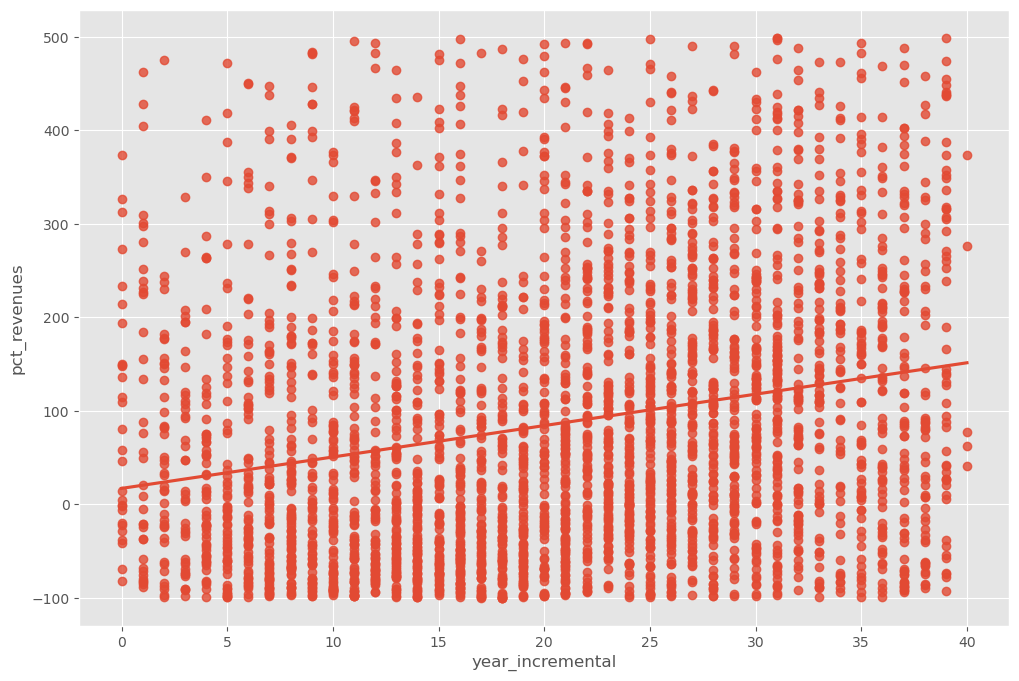

0.05388173715496014


In [336]:
# LINEAR REGRESSION
## Between years and revenue%

## Removing revenues% more than 500%

df_year_revenue = df_cleaned.query('pct_revenues < 500')

sns.regplot(x='year_incremental',
           y= 'pct_revenues',
           data = df_year_revenue,
           ci = None)
plt.show()

print(ols("pct_revenues ~ year_incremental", data = df_year_revenue ).fit().rsquared)

In [ ]:
## 0.05 IS WEAK CORRELATION

In [334]:
## REGRESSION BETWEEN BUDGET_indp AND GROSS_depnd
### Model

mdl_budget_vs_gross = ols("gross ~ budget" , data = df_cleaned).fit()

### Explanatory data DataFrame

explanatory_data = pd.DataFrame({'budget': [523400000,800000000,921300000]})

### Predicted Gross

predicted_gross = explanatory_data.assign(
                        gross = mdl_budget_vs_gross.predict(explanatory_data))

print(predicted_gross)

      budget         gross
0  523400000  1.789368e+09
1  800000000  2.748107e+09
2  921300000  3.168552e+09


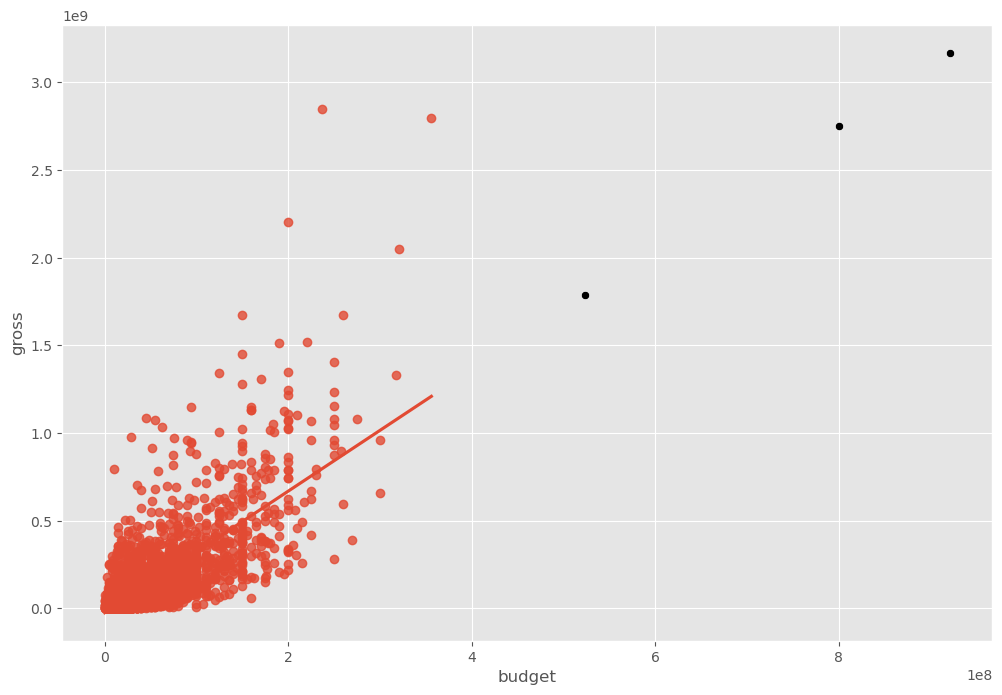

In [335]:
### Plot the regression model and prediction points

fig = plt.figure() #for multiple layers

sns.regplot(x='budget',
           y= 'gross',
           data = df_cleaned,
           ci = None
         )


sns.scatterplot(x='budget',
           y= 'gross',
           data = predicted_gross,
           color = 'black'
            )

plt.show()


In [337]:
# QUANTIFYING MODEL FIT

print(mdl_budget_vs_gross.rsquared)

0.5548705344911546


In [ ]:
# FROM THE REGRESSION MODEL WE MANAGED TO PREDICT SOME GROSS PROFITS FROM RANDOM BUDGET VALUES 